In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
import seaborn as sns

In [2]:
data = pd.read_csv('drive/My Drive/UNSW/2022/data3001/datascience-cis-2022.csv')
data['easytime'] = pd.to_datetime(data['time'], unit='ns')
data.head()

,time,FromInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount,...,ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount,ToLocalUDPPort5353IP224.0.0.251/32ByteCount,ToLocalUDPPort5353IP224.0.0.251/32PacketCount,ToLocalUDPPort67IP255.255.255.255/32ByteCount,ToLocalUDPPort67IP255.255.255.255/32PacketCount,device_mac,easytime
0,1662078299417000000,0,0,0,0,0,0,0,0,3568,...,395738,957,12625992,9093,0,0,0,0,bd:0d:8e:c5,2022-09-02 00:24:59.417
1,1662078299417000000,0,0,0,0,71161,266,0,0,1784,...,68385,150,0,0,0,0,0,0,bd:24:bb:1e,2022-09-02 00:24:59.417
2,1662078299417000000,0,0,0,0,25880,91,0,0,3568,...,103786,243,0,0,0,0,0,0,bd:0d:af:0b,2022-09-02 00:24:59.417
3,1662078299417000000,0,0,0,0,0,0,0,0,3568,...,29638,81,0,0,0,0,0,0,ee:dd:34:1d,2022-09-02 00:24:59.417
4,1662078299417000000,0,0,0,0,0,0,1400,4,1784,...,0,0,0,0,0,0,906,2,ee:dd:39:08,2022-09-02 00:24:59.417


In [3]:
data = data.iloc[:, [9,10,11,12,13,14,15,16,17,18,23,24]]

In [4]:
data

,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketCount,ToInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount,ToInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount,device_mac,easytime
0,3568,8,0,0,0,0,395738,957,12625992,9093,bd:0d:8e:c5,2022-09-02 00:24:59.417
1,1784,4,0,0,14674098,11246,68385,150,0,0,bd:24:bb:1e,2022-09-02 00:24:59.417
2,3568,8,0,0,0,0,103786,243,0,0,bd:0d:af:0b,2022-09-02 00:24:59.417
3,3568,8,0,0,0,0,29638,81,0,0,ee:dd:34:1d,2022-09-02 00:24:59.417
4,1784,4,0,0,13021325,9857,0,0,0,0,ee:dd:39:08,2022-09-02 00:24:59.417
...,...,...,...,...,...,...,...,...,...,...,...,...
14376693,3568,8,0,0,0,0,104138,243,0,0,bd:1c:cf:14,2022-09-16 00:23:55.620
14376694,1800,4,0,0,0,0,7626,15,0,0,21:fa:29:50,2022-09-16 00:23:55.620
14376695,3568,8,0,0,0,0,0,0,25741286,18510,ee:dd:49:33,2022-09-16 00:23:55.620
14376696,1784,4,0,0,13029390,9725,98181,230,0,0,ee:dd:38:3b,2022-09-16 00:23:55.620


In [ ]:
for i in data:
    if i != 'device_mac' and i != 'easytime':
        m = re.match(r"(\w+)\:\w+\:\w+\:\w+\:(\w+)", str(i))
        direction = m[1][:2]
        port = re.search(r"Port(\w+)IPurn",m[1]).group(1)
        types = re.search(r"er(\w+)Count",m[2]).group(1)
        new_name = (direction + '_' + port + '_' + types).lower()
        data.rename(columns = {i:new_name}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
def calculate_time_index(given_month, given_day, given_hour, data, start_index):
    """
    gives out index of input hour or date
    """
    def change_to_double(time):
        """
        If given time is single digit change to double
        """
        if len(str(time)) == 1:
            return '0' + str(time)
        return time

    time_of_index = int(start_index)
    given_month = change_to_double(given_month)
    given_day = change_to_double(given_day)
    given_hour = change_to_double(given_hour)
    for i in data["easytime"][start_index:]:
        time_of_index += 1
        month = str(i)[5:7]
        day = str(i)[8:10]
        hour = str(i)[11:13]
        if month == str(given_month) and day == str(given_day) and hour == str(given_hour):
            return time_of_index

In [ ]:
def train_test_split(month, day, hour, data):
    """
    hour: train finishing time/ test starting hour
    data: input data
    """

    start_train_index = calculate_time_index(month, int(day) - 1, hour, data, 0)
    end_train_index = calculate_time_index(month, day, hour, data, start_train_index)
    if int(hour) + 6 > 24:
        day = int(day) + 1
        hour = int(hour) - 24
    end_test_index = calculate_time_index(month, day, int(hour) + 1, data, end_train_index)
    train = data[start_train_index : end_train_index]
    test = data[end_train_index : end_test_index]
    return train, test

In [ ]:
class_dict = {
  "0": "all",
  "1": "443",
  "2": "554",
  "3": "80",
  "4": "1024",
}
def train_concat(train):
    train_all = train[["to_all_byte", "to_all_packet"]]
    train_443 = train[["to_443_byte", "to_443_packet"]]
    train_554 = train[["to_554_byte", "to_554_packet"]]
    train_80 = train[["to_80_byte", "to_80_packet"]]
    train_1024 = train[["to_1024_byte", "to_1024_packet"]]

    train_all.insert(2, "class", "0")
    train_443.insert(2, "class", "1")
    train_554.insert(2, "class", "2")
    train_80.insert(2, "class", "3")
    train_1024.insert(2, "class", "4")

    concat = pd.concat([train_all.rename(columns={'to_all_byte':'byte', 'to_all_packet':'packet'}),\
                    train_443.rename(columns={'to_443_byte':'byte', 'to_443_packet':'packet'}),\
                    train_554.rename(columns={'to_554_byte':'byte', 'to_554_packet':'packet'}),\
                    train_80.rename(columns={'to_80_byte':'byte', 'to_80_packet':'packet'}),\
                    train_1024.rename(columns={'to_1024_byte':'byte', 'to_1024_packet':'packet'})],\
                    ignore_index = True)
    concat = concat[concat['packet'] != 0]
    concat['byte'] = (concat['byte']/concat['packet'])
    concat = concat.astype({"byte":"int","packet":"int", "class":"int"})
    return concat

In [ ]:
# linear one
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
new_list = []
train, test = train_test_split('09', '3', '00', data)
concat = train_concat(train)
knn_model = KNeighborsRegressor(n_neighbors=3)
X_train = concat.iloc[:, :2].to_numpy()
y_train = concat.iloc[:, 2].to_numpy()
knn_model.fit(X_train, y_train)
test = test.iloc[:, 4:6] #change here
test = test.set_axis(['byte', 'packet'], axis='columns')
test = test[test['packet'] != 0]
test['byte'] = (test['byte']/test['packet'])
test['class'] = int(2) #change here

x_test = test.iloc[:,:2]
x_test = x_test.to_numpy()

y_test = test.iloc[:, 2]

new_test_preds = knn_model.predict(x_test)
new_test_preds = np.ceil(new_test_preds).astype(int)
new_list.append(accuracy_score(y_test, new_test_preds))

In [ ]:
np.unique(new_test_preds, return_counts=True)

(array([0, 2, 3, 4]), array([   1, 5311,   45,   25]))

In [ ]:
new_list

[0.9868078781122259]

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
list_443 = []
for date in range(3, 15):
    for time in ['00', '12']:
        print(f"{date},{time}")
        train, test = train_test_split('09', date, time, data)
        concat = train_concat(train)
        knn_model = KNeighborsRegressor(n_neighbors=3)
        X_train = concat.iloc[:, :2].to_numpy()
        y_train = concat.iloc[:, 2].to_numpy()
        knn_model.fit(X_train, y_train)
        test = test.iloc[:, 4:6] #change here
        test = test.set_axis(['byte', 'packet'], axis='columns')
        test = test[test['packet'] != 0]
        test['byte'] = (test['byte']/test['packet'])**2
        test['class'] = int(0) #change here

        x_test = test.iloc[:,:2]
        x_test = x_test.to_numpy()

        y_test = test.iloc[:, 2]

        new_test_preds = knn_model.predict(x_test)
        new_test_preds = np.ceil(new_test_preds).astype(int)
        list_443.append(accuracy_score(y_test, new_test_preds))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
list_443 = []
for date in range(3, 15):
    for time in ['00', '12']:
        print(f"{date},{time}")
        train, test = train_test_split('09', date, time, data)
        concat = train_concat(train)
        knn_model = KNeighborsRegressor(n_neighbors=3)
        X_train = concat.iloc[:, :2].to_numpy()
        y_train = concat.iloc[:, 2].to_numpy()
        knn_model.fit(X_train, y_train)
        test = test.iloc[:, 4:6] #change here
        test = test.set_axis(['byte', 'packet'], axis='columns')
        test = test[test['packet'] != 0]
        test['byte'] = (test['byte']/test['packet'])**2
        test['class'] = int(2) #change here

        x_test = test.iloc[:,:2]
        x_test = x_test.to_numpy()

        y_test = test.iloc[:, 2]

        new_test_preds = knn_model.predict(x_test)
        new_test_preds = np.ceil(new_test_preds).astype(int)
        list_443.append(accuracy_score(y_test, new_test_preds))

3,00
3,12
4,00
4,12
5,00
5,12
6,00
6,12
7,00
7,12
8,00
8,12
9,00
9,12
10,00
10,12
11,00
11,12
12,00
12,12
13,00
13,12
14,00
14,12


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
list_1024 = []
for date in range(3, 15):
    for time in ['00', '12']:
        print(f"{date},{time}")
        train, test = train_test_split('09', date, time, data)
        concat = train_concat(train)
        knn_model = KNeighborsRegressor(n_neighbors=3)
        X_train = concat.iloc[:, :2].to_numpy()
        y_train = concat.iloc[:, 2].to_numpy()
        knn_model.fit(X_train, y_train)
        test = test.iloc[:, 8:10] #change here
        test = test.set_axis(['byte', 'packet'], axis='columns')
        test = test[test['packet'] != 0]
        test['byte'] = (test['byte']/test['packet'])**2
        test['class'] = int(4) #change here

        x_test = test.iloc[:,:2]
        x_test = x_test.to_numpy()

        y_test = test.iloc[:, 2]

        new_test_preds = knn_model.predict(x_test)
        new_test_preds = np.ceil(new_test_preds).astype(int)
        list_1024.append(accuracy_score(y_test, new_test_preds))

3,00
3,12
4,00
4,12
5,00
5,12
6,00
6,12
7,00
7,12
8,00
8,12
9,00
9,12
10,00
10,12
11,00
11,12
12,00
12,12
13,00
13,12
14,00
14,12


<ipython-input-29-fa3ff6fa7396>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['byte'] = (test['byte']/test['packet'])**2
<ipython-input-29-fa3ff6fa7396>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['class'] = int(4) #change here


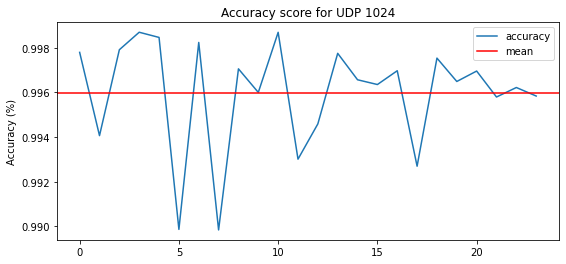

In [ ]:
plt.figure(figsize=(9,4))

plt.title('Accuracy score for UDP 1024')
plt.ylabel('Accuracy (%)')
plt.plot(list_1024)
plt.axhline(y = 0.9959714220141075, color = 'r', linestyle = '-')
plt.legend(['accuracy', 'mean'])

In [ ]:
np.mean(list_443)

0.9850477207323346

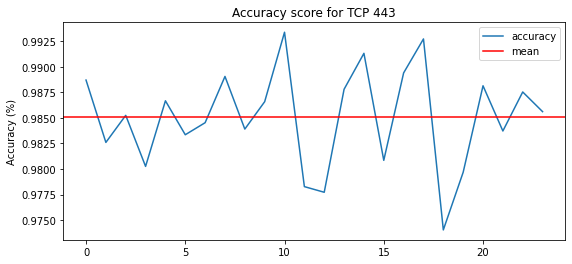

In [ ]:
plt.figure(figsize=(9,4))
plt.title('Accuracy score for TCP 443')
plt.ylabel('Accuracy (%)')
plt.plot(list_443)
plt.axhline(y = 0.9850477207323346, color = 'r', linestyle = '-')
plt.legend(['accuracy', 'mean'])